In [ ]:
!pip install yfinance

import yfinance as yf

tickerSymbol = 'AAPL'

tickerData = yf.Ticker(tickerSymbol)

tickerDf = tickerData.history(period='1d', start='2010-1-1', end='2020-1-25')


print(tickerDf)


                                Open       High        Low      Close  \
Date                                                                    
2010-01-04 00:00:00-05:00   6.437013   6.469284   6.405345   6.454506   
2010-01-05 00:00:00-05:00   6.472300   6.502158   6.431583   6.465664   
2010-01-06 00:00:00-05:00   6.465665   6.491301   6.356184   6.362820   
2010-01-07 00:00:00-05:00   6.386343   6.393883   6.304911   6.351056   
2010-01-08 00:00:00-05:00   6.342613   6.393885   6.305216   6.393281   
...                              ...        ...        ...        ...   
2020-01-17 00:00:00-05:00  76.738892  77.338206  76.430745  77.335785   
2020-01-21 00:00:00-05:00  76.962118  77.406141  76.673379  76.811684   
2020-01-22 00:00:00-05:00  77.299391  77.641511  76.991244  77.085876   
2020-01-23 00:00:00-05:00  77.139238  77.537159  76.588447  77.457092   
2020-01-24 00:00:00-05:00  77.704588  78.451908  77.042186  77.233871   

                              Volume  Dividends  S

In [ ]:
!pip install yfinance numpy pandas scikit-learn matplotlib tensorflow


In [ ]:
import yfinance as yf
import pandas as pd


tickerSymbol = 'AAPL'


tickerData = yf.Ticker(tickerSymbol)


tickerDf = tickerData.history(period='1d', start='2010-1-1', end='2020-1-25')


print(tickerDf.head())
print(tickerDf.shape)
#print(tickerDf.describe())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-01-04 00:00:00-05:00  6.437013  6.469284  6.405345  6.454506  493729600   
2010-01-05 00:00:00-05:00  6.472302  6.502160  6.431585  6.465666  601904800   
2010-01-06 00:00:00-05:00  6.465664  6.491300  6.356184  6.362819  552160000   
2010-01-07 00:00:00-05:00  6.386344  6.393884  6.304912  6.351057  477131200   
2010-01-08 00:00:00-05:00  6.342615  6.393887  6.305217  6.393283  447610800   

                           Dividends  Stock Splits  
Date                                                
2010-01-04 00:00:00-05:00        0.0           0.0  
2010-01-05 00:00:00-05:00        0.0           0.0  
2010-01-06 00:00:00-05:00        0.0           0.0  
2010-01-07 00:00:00-05:00        0.0           0.0  
2010-01-08 00:00:00-05:00        0.0           0.0  
(2532, 7)


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler


close_prices = tickerDf['Close'].values
close_prices = close_prices.reshape(-1, 1)


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)


def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)


seq_length = 60
x, y = create_sequences(scaled_data, seq_length)


x = x.reshape((x.shape[0], x.shape[1], 1))


train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
# print(dataset.shape())

model = Sequential()


model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, 1)))
model.add(MaxPooling1D(pool_size=2))


model.add(LSTM(units=50, return_sequences=False))


model.add(Dropout(0.2))


model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error')


history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0184 - val_loss: 0.0024
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 7.2222e-04 - val_loss: 0.0014
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 5.6575e-04 - val_loss: 0.0011
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 5.6146e-04 - val_loss: 0.0011
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 5.3830e-04 - val_loss: 0.0011
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 4.2918e-04 - val_loss: 9.2981e-04
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.0373e-04 - val_loss: 0.0011
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 4.1911e-04 - val_loss: 0.0013
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.0572e-04 - val_loss: 9.0494e-04
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 3.9552e-04 - val_loss: 0.0020
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 3.5879e-04 - val_loss: 8.6907e-04
Epoch 12/20

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 58, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 29, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 50)                  │          23,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 69,923 (273.14 KB)

 Trainable params: 23,307 (91.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 46,616 (182.10 KB)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


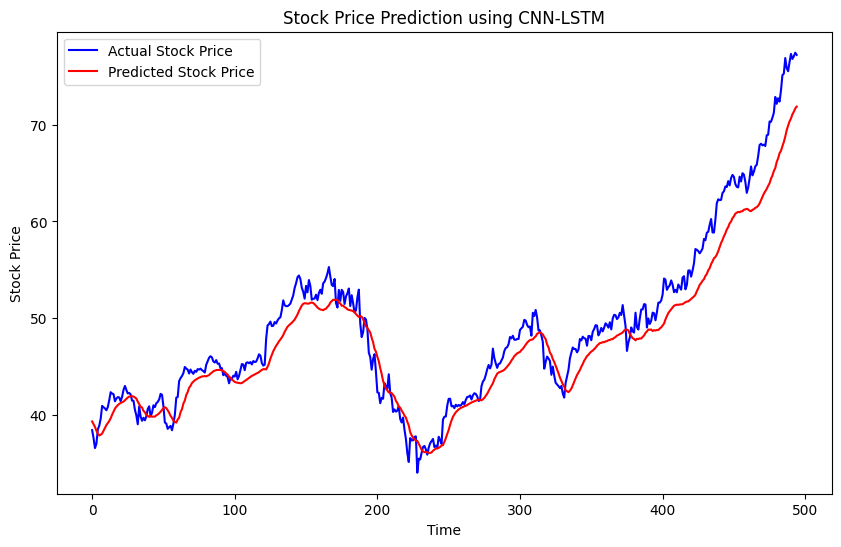

In [ ]:

predicted_prices = model.predict(x_test)


predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))


real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))


import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(real_prices, color='blue', label='Actual Stock Price')
plt.plot(predicted_prices, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction using CNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
